# Fitting Models Exercise 2

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

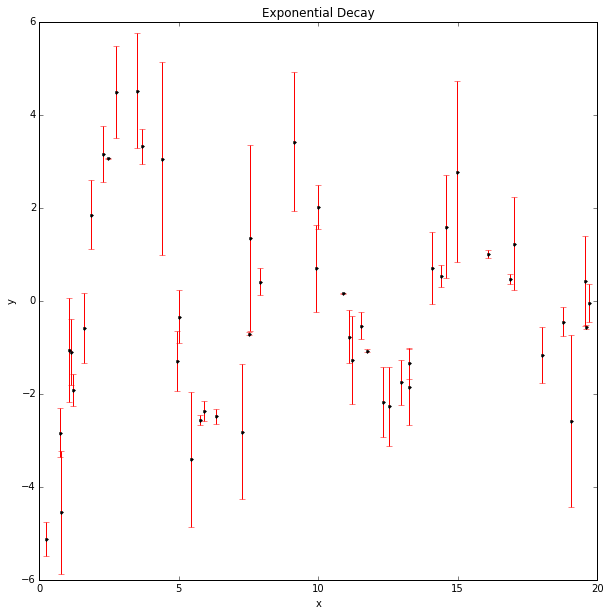

In [2]:
Things = np.load("decay_osc.npz")
tdata = np.array(Things['tdata'])
ydata = np.array(Things['ydata'])
dy = np.array(Things['dy'])
plt.figure(figsize=(10,10));
plt.title("Exponential Decay");
plt.xlabel('x');
plt.ylabel('y');
plt.errorbar(tdata,ydata,dy,fmt='.k',ecolor='red');

In [3]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

A = -4.896 +/- 0.063
λ = 0.094 +/- 0.003
ω = -1.001 +/- 0.001
δ = 0.027 +/- 0.014


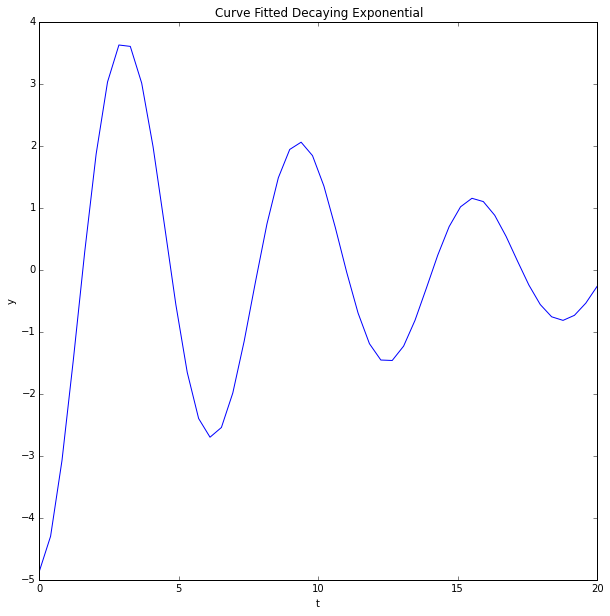

In [15]:
def model(tdata,A,L,W,D):
    return A*np.exp(-L*tdata)*np.cos(W*tdata)+D
best,model = opt.curve_fit(model,tdata,ydata,sigma=dy,absolute_sigma=True)
print('A = {0:.3f} +/- {1:.3f}'.format(best[0],np.sqrt(model[0,0])))
print('λ = {0:.3f} +/- {1:.3f}'.format(best[1],np.sqrt(model[1,1])))
print('ω = {0:.3f} +/- {1:.3f}'.format(best[2],np.sqrt(model[2,2])))
print('δ = {0:.3f} +/- {1:.3f}'.format(best[3],np.sqrt(model[3,3])))
tfit = np.linspace(0,20)
yfit = best[0]*np.exp(-best[1]*tfit)*np.cos(best[2]*tfit)+best[3]
plt.figure(figsize=(10,10))
plt.plot(tfit,yfit);
#plt.errorbar(tdata,ydata,dy,fmt='.k',ecolor='red')
plt.xlabel('t');
plt.ylabel('y');
plt.title("Curve Fitted Decaying Exponential");

In [8]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors